In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [343]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [344]:
import edhec_risk_kit as erk

In [345]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

## Time value of money

We recall from week 1, that is, in general, for given a time frame $(t, t+k)$, with $k>1$, the **compound return** over the time frame is given by:
$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1, 
$$
and if single returns are all the same over time periods, say $R$, then the formula for compound returns simply becomes: 
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

Therefore, if we suppose that $P_t$ was the price a t time $t$ and $P_{t+k}$ is the time when all returns have been compounded, we know that:
$$
P_{t+k} = P_t(1 + R_{t, t+k}) = 
\begin{cases}
& P_t \; (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k})\;  & \text{if returns are different}, \\
& P_t \; (1+R)^{k} \;  & \text{if all returns are equal to $R$}.
\end{cases}
$$

### Present and future value

In general, we say that $P_{t+k}$ is the **future value (FV)** of the amount of money equal to $P_t$. Likewise, we say that 
$P_t$ is the **present value (PV)** of the amount of money $P_{t+k}$ due in the future (at time $t+k$).

For example, $100\$$ invested for one year and earning $5\%$ interest will be worth $105\$$ after one year. 
Therefore, **both $100\$$ paid now and $105\$$ paid exactly one year later have the same value to a recipient who expects $5\%$ 
interest** (assuming that inflation would be zero): that is, $100\$$ (PV) invested for one year at $5\%$ 
interest has a future value (FV) of $105\$$.

Let us consider the case of equal returns $R$ over time. From the equation above we see that to obtain present value PV (i.e., 
the amount that we would have to invest today) we have to **discount** the future value FV (or payment amount) by the interest rate for the period. Hence:
$$
FV = PV(1 + R)^k
\qquad\text{and}\qquad
PV = \frac{FV}{(1 + R)^k}.
$$


### Discount rate

The factor
$$
\frac{1}{(1+R)^k}, 
$$
is called the **discount rate**.

**EXAMPLE**: suppose we are giving an option to receive $1000\$$ today and receiving the same amount of $1000\$$ in three years. 
*What we would choose?*

**We should get the money today, of course**. In fact, receiving $1000\$$ today means that the present value is $PV=1000$, and this amount could be invested and become bigger in three years. Suppose we invest it for three year at annual rate of $3\%$. 
The future value of $1000\%$ today will be 
$$
FV = 1000 (1 + 0.03)^3 = 1.092.7\$. 
$$
If we instead decide to get the money in three years, basically the amount $1000\%$ is already our future value. That is, supposing the same interest rate, the present value of $1000\$$ in three years is:
$$
PV = \frac{1000}{(1+0.03)^3} = 915,14\$, 
$$
and this means that today, we would accept less money ($915,14\$ < 1000\$$).


**EXAMPLE**: suppose we are giving an option to receive $1000\$$ today or receiving $1100\$$ in three years. 
*What we would choose now?*

This is more difficult now, because we get $1000\$$ we may end up with an amount of money which is less than $1152$ in three years. 
In fact, if we suppose that our hypotetical investment still guarantee an annual $3\%$ interest rate, it means that the present value of 
$1150\$$ after three years is:
$$
PV = \frac{1150}{(1+0.03)^3} = 1052.41\$.
$$
That is, taking $1150\$$ in three years is equivalent get $1052.41\$$ today, which is an amount larger than $1000\$$. 
**We will then decide to get the money later**.

### Cumulative present value (of future cash flows)

The **cumulative present value** (PV) of future cash flows can be calculated by summing the contributions of future values $FV_t$, i.e., the value of cash flow at time $t$. 

Suppose that company A owes to company B a total of $25000\$$ over three years divided in this way: $8000\$$ in the first year, $11000\$$ in the second year, and $6000\$$ in third year. Suppose that company B applies a $5\%$ annual interest rate. 
What is the present value of such **liability**?. 

We know that the present value of an amount of $FV_1 := 8000\$$ in one year is given by $PV_1 = 8000 / (1+0.05)=7619.05\$$. 
Analogously, the present value of an amount of $FV_2 := 11000\$$ in two years is by $PV_2 = 11000 / (1+0.05)^2=9977.33\$$. 
And finally, the present value of an amount of $FV_3 := 6000\$$ in three years is by $PV_3 = 6000 / (1+0.05)^3=5183.03\$$. 

Wrapping up, the present value of the entire liability is given by the sum of single present values of future cashflow, i.e., 
about $PV_1+PV_2+PV_3 = 22779.4\$$.  

In general, if we **denote the future cash flows as the future values**, we have that the present value of 
a **liability** $L$ is:
$$
PV(L) = \sum_{i=1}^N \frac{FV_{t_i}}{(1+R)^{t_i}} := \sum_{i=1}^N B(t_i) L_{t_i}, 
$$
and $L_{t_i}$ denotes the future cash flow at time $t_i$, i.e., the **liability at time $t_i$**, and 
$B(t_i) := 1 / (1+R)^{t_i}$ denotes the **discount rate**.

In [29]:
# Suppose we want to know the PV of 1 dollar paid in 10 years at an annual interest rate of 3%:
PV = erk.discount(10, 0.03)
PV

0.7440939148967249

In [30]:
# that is, PV = 0.74 cents will be FV = 1 in 10 years (considering r = 3%). In fact:
FV = PV * (1+0.03)**10
FV

1.0

Suppose we have two series of liabilities (i.e. series of future cashflows) for the next three years:

In [184]:
L = pd.DataFrame([[8000,11000],[11000,2000],[6000,15000]], index=[1,2,3])
L

,0,1
1,8000,11000
2,11000,2000
3,6000,15000


whose total value to be paid is equal to, respectively:

In [185]:
L.sum()

0    25000
1    28000
dtype: int64

and suppose that the first liability as a annual rate of $5\%$ and the second one a rate of $3\%$. 
The present value of such liabilities is then given by:

In [211]:
r = [0.05, 0.03] 
PV = erk.present_value(L, r)
PV

0    22779.397473
1    26291.928359
dtype: float64

that is, we owe $25000\$$ and $28000\$$ in the next three years (the total value of the liabilities), and their present value 
is about $22779.4\$$ and $26292\$$, respectively. 

This is means that if today our assets had a value equal to these present values, we would have no problem in paying off 
the liabilities (since I know what interest rates are). 
We would have a problem in case today we had less than, for example, $22779.4\$$ because with current interest rates we 
will not be able to pay $25000$ in three years.

### Funding ratio

The funding ratio is therefore a simply ratio between the value of assets I currently hold and the present value of my liability.
$$
FR = \frac{\text{assets}}{{PV(L)}}.
$$
If the value of my current assets if bigger than $PV(L)$, then $FR >1$ and this means that I have enough funds to pay of my liability in the coming future. In the example above:

In [222]:
asset = [20000, 27332] 
FR = erk.funding_ratio(asset, L, r)
FR

0    0.877986
1    1.039559
dtype: float64

that is, if we currently have $20000\$$, we won't be able to payoff $25000\$$ in three years for the first liability. 
On the other hand, having a present value of $27332\$$ for the second asset will be enough to payoff the second liability of $28000\$$ in three years.

In [261]:
def show_funding_ratio(asset, L, r):
    fr = erk.funding_ratio(asset, L, r)
    print("Funding ratio: {:.3f}".format(float(fr)))
    
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].scatter(r, fr)
    ax[0].set_xlabel("rates")
    ax[0].set_ylabel("funding ratio")
    ax[0].set_xlim([0.0, 0.06])
    ax[0].set_ylim([0.70, 1.2])
    ax[0].plot([r,r],[0,fr], color="b", alpha=0.5)
    ax[0].plot([0,r],[fr,fr], color="b", alpha=0.5)
    ax[0].grid()
    
    ax[1].scatter(asset, fr)
    ax[1].set_xlabel("assets")
    ax[1].set_ylabel("funding ratio")
    ax[1].set_xlim([17000, 30000])
    ax[1].set_ylim([0.70, 1.2])
    ax[1].plot([asset,asset],[0,fr], color="b", alpha=0.5)
    ax[1].plot([0,asset],[fr,fr], color="b", alpha=0.5)
    ax[1].grid()

Funding ratio: 0.997


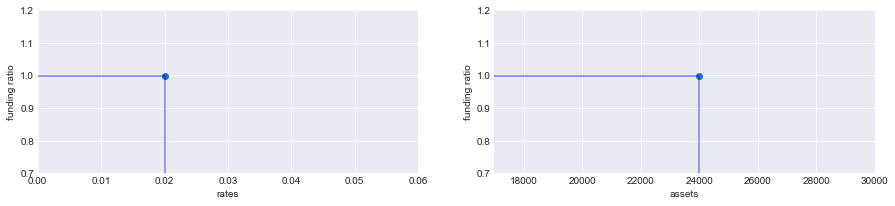

In [262]:
r     = 0.02
asset = 24000
L     = pd.DataFrame([8000, 11000, 6000],index=[1,2,3])

show_funding_ratio(asset, L, r)

### Nominal rate and Effective annual interest rate

Before introducing a stochastic equation modelling the change in interest rates, let us for a second come back to compound returns in order to look at them from another point of view which changes nomenclature. 

#### Short-rate v.s. Long-Rate (annualized)
Recall that given a fixed return $R$, the compound return after a period of length $t+k$ (starting from $t$) is given by:
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

For example, suppose that we borrow some money, say $P := 1\$$, during one year at annual interest rate of $r_{ann} := 10\%$. 
Also, suppose that we have to pay back in one solution at the end of the year. This means that the return after one year is $10\%$ and
we have to pay back:
$$
1 + 0.1\cdot 1 = 1.1\$.
$$
Now, suppose that we still borrow $P$ at interest rate $r := 10\%$ but with have to pay in two solutions, i.e., every $6$ months. 
Hence, we get the semi-annual rate $r/2 = 5\%$ which gives a total compound return of 
$$
\left(1 + \frac{r}{2}\right)^2 -1 = 0.1025\$,
$$
and then we have to pay back $1 + 0.1025\cdot 1= 1.1025\$$.
If, in the same case, payments were due every month, we would have:
$$
\left(1 + \frac{r}{12}\right)^{12}-1 = 0.1047\$,
$$
and then we have to pay back $1 + 0.1047\cdot 1= 1.1047\$$.

We can see that due to compounding, **the more payments due over the entire period the larger the total compound return, hence more money have to be paid back**. 

In general, given a **nominal interest rate** $r$ (also called **instantaneous interest rate**) and $N$ **number of periods**, i.e., the number of payments (of the investment, loan, and so on), 
the total return is given by:
$$
R = \left(1 + \frac{r}{N}\right)^N - 1.
$$
Such $R$ is nothing but that the **annualized return** (as we used to call it so far) or the **effective annual interest rate**.

In [15]:
# Consider a nominal interest rate of 10% and monthly payments
nominal_rate = 0.1
periods_per_year = 12

# that is, every month, we have the following rates
rets = pd.DataFrame( [nominal_rate/periods_per_year for i in range(10)] )
rets.head(3)

,0
0,0.008333
1,0.008333
2,0.008333


Due to compounding, we have:

In [16]:
ann_ret = erk.annualize_rets(rets, periods_per_year)
ann_ret

0    0.104713
dtype: float64

In [17]:
R = (1 + nominal_rate / periods_per_year)**periods_per_year - 1
np.round(R,6)

0.104713

Notice that we got, obviously, the same number (and that it does not depend on the number of returns in the dataframe...). 

By having the annualized return expressed in the form above, we realize that when $N$ becomes large we have:
$$
\lim_{N\to \infty} \left(1 + \frac{r}{N} \right)^N = e^{r}, 
$$
and then 
$$
1 + R \approx e^r.
$$
Then we have:
$$
R \approx e^r - 1
\quad\text{and}\quad 
r \approx \log{(1 + R)}.
$$

## CIR model: simulate changes in interest rates

The **CIR model** (from **Cox, Ingersoll, Ross**) is used to simulate changes in interest rates (returns) and it is an extension of the **Vasicek** model to prevent negative interest rates. It is a type of **one factor model**, or **short-rate model**, 
as it describes interest rate movements as driven by only one source of market risk. 
The model can be used in the valuation of interest rate derivatives. 

The dynamic for interest rates is modelled in the following way:
$$
dr_t = a(b-r_t)dt + \sigma\sqrt{r_t}dW_t,
$$
where, $W_t$ is a Brownian motion (see Week 3) which models the random market risk factor, $b$ is a **(long-term) mean interest rate**, and the difference $b-r_t$ denotes how far away is the current interest rate from the (long-term) mean interest rates, ensuring mean reversion of the interest rate towards $b$.
Finally, $a$ is the **mean-reversion speed**, or speed of adjustment to the mean, which models **how fast** do we revert to the (long-term) mean interest rate.

Hence, movements of interest rates depend on long-term mean rates (by $b$) and how fast the dynamic changes and try to get close to the mean rate (by $a$) after deviations (by the noise given by $\sigma\sqrt{r_t}dW_t$). 
Note that the standard deviation factor $\sigma\sqrt{r_t}$ avoids the possibility of negative interest rates for all positive values of $a$ and $b$. Moreover, an interest rate equal to zero is also precluded if $2ab\geq \sigma^2$. 

More generally, when the rate $r_t$ is close to zero, the standard deviation $\sigma\sqrt{r_t}$ also becomes very small, which dampens the effect of the random shock on the rate. Consequently, in this case, the evolution of the rate becomes dominated by the drift factor 
which pushes the rate upwards (towards equilibrium).

### Using the CIR model for zero-coupon bond pricing

Under the **no-arbitrage assumption**, a **zero-coupon bond** may be priced using the interest rate process modeled by the CIR model. 
The bond price $P(t,T)$ of a zero-coupon bond with maturity $T$ is exponential affine in the interest rate and is given by:
$$
P(t,T) = A(t,T)e^{-B(t,T)r_t}, 
$$
where
$$
\begin{align}
A(t,T) &:= \left( \frac{ 2h e^{(a+h)\tau/2}  }{ 2h+(a+h)(e^{h\tau}-1) }   \right)^{2ab/\sigma^2}, \\
B(t,T) &:= \frac{ 2(e^{h\tau} - 1)  }{ 2h+(a+h)(e^{h\tau}-1) },  \\
h &:= \sqrt{a^2 + 2\sigma^2}, \\
\tau &:= T - \tau.
\end{align}
$$
I hope to come back to this sooner or later.

In [265]:
def show_cir(n_years=10, n_scenarios=10, a=0.05, b=0.05, sigma=0.04, periods_per_year=12, r0=None):
    rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=a, b=b, sigma=sigma, periods_per_year=periods_per_year, r0=r0)
    
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    rates.plot(ax=ax[0], grid=True, title="CIR model: interest rates", color="indianred", legend=False)
    zcb_price.plot(ax=ax[1], grid=True, title="CIR model: ZCB price", color="indianred", legend=False)

cir_controls = widgets.interact(show_cir, 
                                n_years = (1, 10, 1), 
                                n_scenarios = (1, 200, 1), 
                                a = (0.005, 1, 0.005), 
                                b = (0.002, 0.15, 0.001), 
                                sigma = (0.001, 0.15, 0.001), 
                                periods_per_year = [12, 52, 252], 
                                r0 = (0.002, 0.30, 0.01)
                               )

interactive(children=(IntSlider(value=10, description='n_years', max=10, min=1), IntSlider(value=10, descripti…

## Liability hedging 

Since we have a model to simulate interest rates, and then changes in the price of **zero-coupon bonds** we can see what happens to the hedging strategy **in case we use zero-coupon bonds as hedge instead of cash**. 

We have seen that changes in interest rates has enormous impact on the liabilities we may have for the next future, and therefore, on the funding ratios. Hence it makes sense to make sure that we know how the portfolio is going to behave under different interest rates, when fluctuate over time.

The problem is: **we have some liability to satisfy in the future**, and as long as interest rates changes over times, we have to make sure to meet such a liability by using **a hedging strategy so that an increase in value of our asset will be enough**. 

Suppose:

In [436]:
asset_0  = 0.75
tot_liab = 1

mean_rate = 0.03
n_years   = 10
n_scenarios = 10
periods_per_year = 12

that we have an initial amount of $0.75$ million dollars (**asset_0**) and that we have a total liability of $1$ million dollars (**tot_liab**) due in $10$ years. Also, suppose that the mean rate (the nomial rate of this liability) is $3\%$. 

#### Simulate interest rates and zero-coupon bond prices

Given this setup, let us simulate interest rates (starting from the mean rate) for the next 10 years:

In [437]:
rates, zcb_price = erk.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, 
                                    a=0.05, b=mean_rate, sigma=0.08, periods_per_year=periods_per_year)
rates.head()

,0,1,2,3,4,5,6,7,8,9
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.026806,0.029515,0.029888,0.032820,0.031735,0.030689,0.031573,0.026623,0.032481,0.034637
2,0.026936,0.024713,0.025173,0.035931,0.030064,0.030740,0.029238,0.032816,0.038434,0.029256
3,0.034292,0.029002,0.028566,0.032726,0.030433,0.037190,0.036114,0.027100,0.037220,0.030696
4,0.038737,0.033144,0.020726,0.035643,0.030117,0.030610,0.040602,0.026837,0.044359,0.027469


Furthermore, let us suppose that **our liabilities over time is given by the zero-coupon bond prices** that we have just simulated. This is going to be simply a trick to have changes in the liability according to the change in interest rates:

In [438]:
L = zcb_price

#### Hedging by buying zero-coupon bonds

Our task is meet the liability in 10 years. **The idea is invest our current asset in a zero-coupon bond**. 

We know what is the price of a zero-coupon bond that matures in 10 years. Since, by definition, **such bond does not pay coupons and simply returns at maturity the face value plus the given interest**, its price is simply given by the present value of this last amount:

In [439]:
# price of a zcb with maturity 10 years and rate equal to the mean rate
zcb = pd.DataFrame(data=[tot_liab], index=[n_years])
zcb_price_0 = erk.present_value( zcb, mean_rate )
zcb_price_0

0    0.744094
dtype: float64

i.e., a zero-coupon bond paying off $1$ million dollars plus an interest of $3\%$ in 10 years is worth about $0.74$ million dollars today. 

Hence, suppose we invest into such zero-coupon bond. First of all, given our initial asset, we can buy today the following number of bonds:

In [440]:
n_bonds = float(asset_0 / zcb_price_0)
n_bonds

1.0079372845080916

so basically, $1$ such bond, and since we know how interest rates will change over time, 
we also know **the uture value of our asset that have been invested in this zero-coupon bond**. 
In fact, we know how many bonds we buy and how the price will change. Then:

In [441]:
asset_value_of_zcb = n_bonds * zcb_price
asset_value_of_zcb.head()

,0,1,2,3,4,5,6,7,8,9
0,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489
1,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066
2,0.785003,0.770260,0.768253,0.752692,0.758410,0.763966,0.759264,0.786009,0.754472,0.743227
3,0.785821,0.798107,0.795549,0.738269,0.768898,0.765300,0.773325,0.754355,0.725622,0.773232
4,0.748360,0.776175,0.778522,0.756470,0.768536,0.733599,0.739042,0.786468,0.733451,0.767140


#### Hedging by investing in cash 
Suppose now that instead of putting our money in zero-coupon bonds we just put them in cash. What is the future value of our asset then? 

Since interest changes over time, the future value of of our asset is simply obtained by compounding with respect to the interest rates, i.e.,
$$
\text{asset}_{10y} = \text{asset}_0 (1+r_{0,1})(1+r_{1,2})\cdots.
$$

In [442]:
# we have to divide by periods_per_year since rates are returned as annual rates
asset_value_in_cash = asset_0 * (1 + rates/periods_per_year).cumprod()
asset_value_in_cash.head()

,0,1,2,3,4,5,6,7,8,9
0,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875
1,0.753555,0.753724,0.753748,0.753931,0.753863,0.753798,0.753853,0.753543,0.753910,0.754045
2,0.755246,0.755276,0.755329,0.756189,0.755752,0.755729,0.755690,0.755604,0.756325,0.755884
3,0.757404,0.757102,0.757127,0.758251,0.757669,0.758071,0.757964,0.757310,0.758671,0.757817
4,0.759849,0.759193,0.758435,0.760503,0.759570,0.760005,0.760529,0.759004,0.761475,0.759552


#### Result: comparing the two investments

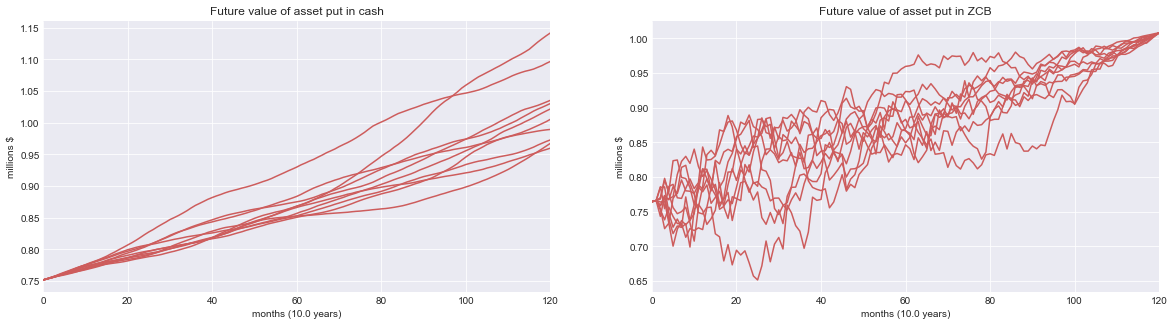

In [443]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

asset_value_in_cash.plot(ax=ax[0], grid=True, legend=False, color="indianred", title="Future value of asset put in cash")
asset_value_of_zcb.plot(ax=ax[1], grid=True, legend=False, color="indianred", title="Future value of asset put in ZCB")
ax[0].set_ylabel("millions $")
ax[1].set_ylabel("millions $")
if periods_per_year == 12:
    ax[0].set_xlabel("months ({:.1f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))
    ax[1].set_xlabel("months ({:.1f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))


plt.show()

We see that, although the increase in value in the left-hand side plot is smoother, there have been **some scenarios in which the investment of our asset value in cash did not provide the $1$ million dollars of liability** that we have to pay.

On the other hand, notheless the oscillation in value, the investment in **the zero-coupon bond always guarantee the money we need at the maturity**.

Let us look at the funding ratios of the two investments:

In [444]:
fr_cash = asset_value_in_cash / L
fr_zcb  = asset_value_of_zcb / L

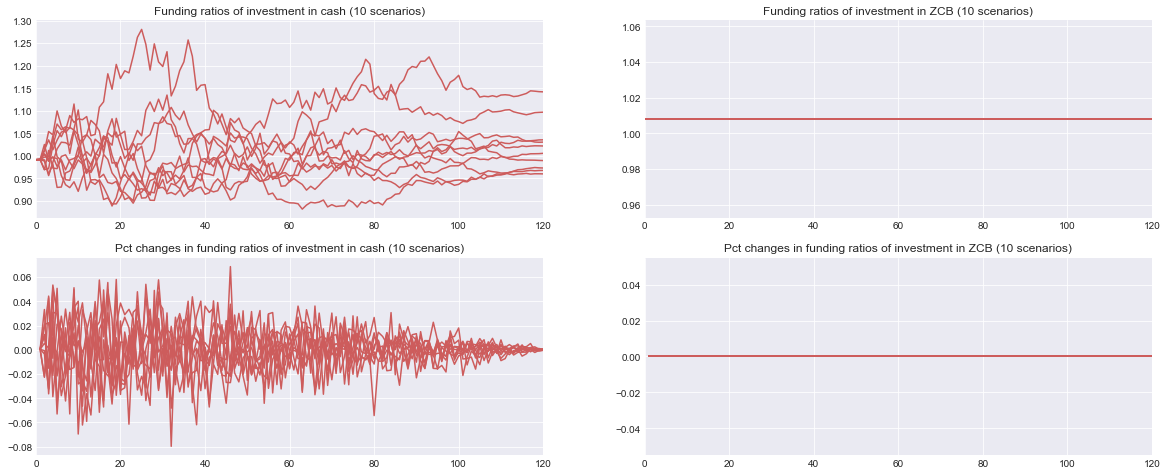

In [445]:
fig, ax = plt.subplots(2,2,figsize=(20,8))

fr_cash.plot(ax=ax[0,0], grid=True, legend=False, color="indianred", 
             title="Funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.plot(ax=ax[0,1], grid=True, legend=False, color="indianred", 
            title="Funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))

fr_cash.pct_change().plot(ax=ax[1,0], grid=True, legend=False, color="indianred",
                          title="Pct changes in funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.pct_change().plot(ax=ax[1,1], grid=True, legend=False, color="indianred", 
                         title="Pct changes in funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))
plt.show()